In [1]:
import pandas as pd
import numpy as np

In [2]:
pet_train=pd.read_csv(r"C:\Users\JaisoN\Desktop\Desktop\Hacker_Earth\Adopt a buddy\Dataset\train.csv")
pet_test=pd.read_csv(r"C:\Users\JaisoN\Desktop\Desktop\Hacker_Earth\Adopt a buddy\Dataset\test.csv")

In [3]:
pet_train.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
pet_test.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [5]:
print(pet_train.shape,pet_test.shape)

(18834, 11) (8072, 9)


In [6]:
pet_train=pet_train.drop(['pet_id'],axis=1)
pet_test=pet_test.drop(['pet_id'],axis=1)

In [7]:
# Converting date and time

In [8]:
import datetime

In [9]:
def extract_date(data):
    date = data['issue_date']
    d=[]
    m=[]
    y=[]
    for day in date:
        dt =pd.to_datetime(datetime.datetime.strptime(day, "%Y-%m-%d  %H:%M:%S"))
        d.append(dt.day)
        m.append(dt.month)
        y.append(dt.year)
    new_date=pd.DataFrame(np.column_stack([d, m, y]),columns=['DAY_issue','MONTH_issue','YEAR_issue'])
    return new_date
    

In [10]:
pet_test.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [11]:
pet_train.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,DAY_issue,MONTH_issue,YEAR_issue
0,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,10,7,2016
1,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,21,11,2013
2,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,28,9,2014
3,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,31,12,2016
4,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,28,9,2017


In [9]:
pet_train=pd.concat([pet_train,extract_date(pet_train)],axis=1)
pet_test=pd.concat([pet_test,extract_date(pet_test)],axis=1)

In [12]:
# Handning Cyclic data - Date

In [10]:
def code_cyclic_features(data,columns,drop_cols=True):
    for col in columns:
        max_val=max(data[col])

        data[col+'_sin']=np.sin(2*np.pi*data[col]/max_val)
        data[col+'_cos']=np.cos(2*np.pi*data[col]/max_val)

        if drop_cols:
            del data[col]
    return data  

In [11]:
code_cyclic_features(pet_train,['DAY_issue','MONTH_issue','YEAR_issue'])
code_cyclic_features(pet_test,['DAY_issue','MONTH_issue','YEAR_issue'])

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,DAY_issue_sin,DAY_issue_cos,MONTH_issue_sin,MONTH_issue_cos,YEAR_issue_sin,YEAR_issue_cos
0,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7,-0.299363,-0.954139,-8.660254e-01,-0.500000,-0.043555,0.999051
1,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1,0.101168,-0.994869,-5.000000e-01,0.866025,-0.003112,0.999995
2,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7,0.790776,-0.612106,-8.660254e-01,0.500000,-0.021782,0.999763
3,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1,0.485302,-0.874347,8.660254e-01,0.500000,-0.012448,0.999923
4,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7,-0.485302,-0.874347,5.000000e-01,0.866025,-0.006224,0.999981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9,0.897805,-0.440394,8.660254e-01,0.500000,-0.009336,0.999956
8068,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9,0.988468,0.151428,-2.449294e-16,1.000000,-0.012448,0.999923
8069,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7,0.998717,-0.050649,-2.449294e-16,1.000000,-0.012448,0.999923
8070,2016-06-28 00:00:00,2017-07-20 18:19:00,NaN,Black,0.79,23.83,0,2,-0.571268,0.820763,1.224647e-16,-1.000000,-0.009336,0.999956


,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,DAY_issue_sin,DAY_issue_cos,MONTH_issue_sin,MONTH_issue_cos,YEAR_issue_sin,YEAR_issue_cos
0,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7,-0.299363,-0.954139,-8.660254e-01,-0.500000,-0.043555,0.999051
1,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1,0.101168,-0.994869,-5.000000e-01,0.866025,-0.003112,0.999995
2,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7,0.790776,-0.612106,-8.660254e-01,0.500000,-0.021782,0.999763
3,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1,0.485302,-0.874347,8.660254e-01,0.500000,-0.012448,0.999923
4,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7,-0.485302,-0.874347,5.000000e-01,0.866025,-0.006224,0.999981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9,0.897805,-0.440394,8.660254e-01,0.500000,-0.009336,0.999956
8068,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9,0.988468,0.151428,-2.449294e-16,1.000000,-0.012448,0.999923
8069,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7,0.998717,-0.050649,-2.449294e-16,1.000000,-0.012448,0.999923
8070,2016-06-28 00:00:00,2017-07-20 18:19:00,NaN,Black,0.79,23.83,0,2,-0.571268,0.820763,1.224647e-16,-1.000000,-0.009336,0.999956


In [12]:
def extract_date(data):
    date = data['listing_date']
    d=[]
    m=[]
    y=[]
    for day in date:
        dt =pd.to_datetime(datetime.datetime.strptime(day, "%Y-%m-%d  %H:%M:%S"))
        d.append(dt.day)
        m.append(dt.month)
        y.append(dt.year)
    new_date=pd.DataFrame(np.column_stack([d, m, y]),columns=['DAY_listing','MONTH_listing','YEAR_listing'])
    return new_date
    

In [13]:
pet_train=pd.concat([pet_train,extract_date(pet_train)],axis=1)
pet_test=pd.concat([pet_test,extract_date(pet_test)],axis=1)

In [21]:
pet_test.head(5)

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,DAY_issue_sin,DAY_issue_cos,MONTH_issue_sin,MONTH_issue_cos,YEAR_issue_sin,YEAR_issue_cos,DAY_listing,MONTH_listing,YEAR_listing
0,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7,-0.299363,-0.954139,-0.866025,-0.500000,-0.043555,0.999051,7,9,2017
1,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1,0.101168,-0.994869,-0.500000,0.866025,-0.003112,0.999995,8,5,2019
2,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7,0.790776,-0.612106,-0.866025,0.500000,-0.021782,0.999763,2,4,2018
3,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1,0.485302,-0.874347,0.866025,0.500000,-0.012448,0.999923,6,4,2018
4,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7,-0.485302,-0.874347,0.500000,0.866025,-0.006224,0.999981,26,4,2018


In [14]:
code_cyclic_features(pet_train,['DAY_listing','MONTH_listing','YEAR_listing'])
code_cyclic_features(pet_test,['DAY_listing','MONTH_listing','YEAR_listing'])

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,DAY_issue_sin,DAY_issue_cos,MONTH_issue_sin,MONTH_issue_cos,YEAR_issue_sin,YEAR_issue_cos,DAY_listing_sin,DAY_listing_cos,MONTH_listing_sin,MONTH_listing_cos,YEAR_listing_sin,YEAR_listing_cos
0,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7,-0.299363,-0.954139,-8.660254e-01,-0.500000,-0.043555,0.999051,0.988468,0.151428,-1.000000,-1.836970e-16,-6.224017e-03,0.999981
1,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1,0.101168,-0.994869,-5.000000e-01,0.866025,-0.003112,0.999995,0.998717,-0.050649,0.500000,-8.660254e-01,-2.449294e-16,1.000000
2,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7,0.790776,-0.612106,-8.660254e-01,0.500000,-0.021782,0.999763,0.394356,0.918958,0.866025,-5.000000e-01,-3.112023e-03,0.999995
3,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1,0.485302,-0.874347,8.660254e-01,0.500000,-0.012448,0.999923,0.937752,0.347305,0.866025,-5.000000e-01,-3.112023e-03,0.999995
4,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7,-0.485302,-0.874347,5.000000e-01,0.866025,-0.006224,0.999981,-0.848644,0.528964,0.866025,-5.000000e-01,-3.112023e-03,0.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9,0.897805,-0.440394,8.660254e-01,0.500000,-0.009336,0.999956,0.897805,-0.440394,1.000000,6.123234e-17,-6.224017e-03,0.999981
8068,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9,0.988468,0.151428,-2.449294e-16,1.000000,-0.012448,0.999923,0.651372,-0.758758,0.866025,5.000000e-01,-3.112023e-03,0.999995
8069,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7,0.998717,-0.050649,-2.449294e-16,1.000000,-0.012448,0.999923,0.724793,0.688967,0.500000,8.660254e-01,-6.224017e-03,0.999981
8070,2016-06-28 00:00:00,2017-07-20 18:19:00,NaN,Black,0.79,23.83,0,2,-0.571268,0.820763,1.224647e-16,-1.000000,-0.009336,0.999956,-0.790776,-0.612106,-0.500000,-8.660254e-01,-6.224017e-03,0.999981


In [15]:
import seaborn as sns

[]

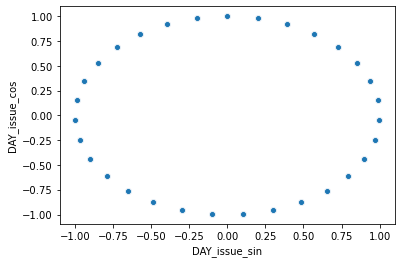

In [16]:
sns.scatterplot(pet_train['DAY_issue_sin'],pet_train['DAY_issue_cos']).plot()

[]

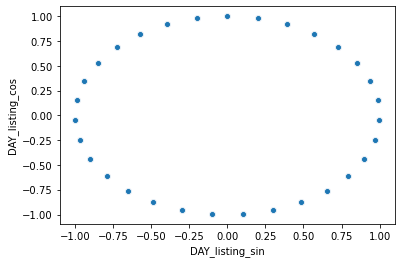

In [17]:
sns.scatterplot(pet_test['DAY_listing_sin'],pet_test['DAY_listing_cos']).plot()

In [18]:
for col in ['issue_date','listing_date']:
    pet_train[col]=pd.to_datetime(pet_train[col],infer_datetime_format=True)
    pet_test[col]=pd.to_datetime(pet_test[col],infer_datetime_format=True)

In [19]:
pet_train['day_diff']=pd.to_numeric(pet_train['listing_date']-pet_train['issue_date'])
pet_test['day_diff']=pd.to_numeric(pet_test['listing_date']-pet_test['issue_date'])

In [20]:
for col in ['issue_date','listing_date']:
    pet_train.drop([col],1,inplace=True)
    pet_test.drop([col],1,inplace=True)

In [21]:
for col in pet_train.select_dtypes(['object']).columns:
    print(col,':',pet_train[col].nunique())

color_type : 56


In [22]:
pet_train.dtypes

condition            float64
color_type            object
length(m)            float64
height(cm)           float64
X1                     int64
X2                     int64
breed_category       float64
pet_category           int64
DAY_issue_sin        float64
DAY_issue_cos        float64
MONTH_issue_sin      float64
MONTH_issue_cos      float64
YEAR_issue_sin       float64
YEAR_issue_cos       float64
DAY_listing_sin      float64
DAY_listing_cos      float64
MONTH_listing_sin    float64
MONTH_listing_cos    float64
YEAR_listing_sin     float64
YEAR_listing_cos     float64
day_diff               int64
dtype: object

In [23]:
pet_test.dtypes

condition            float64
color_type            object
length(m)            float64
height(cm)           float64
X1                     int64
X2                     int64
DAY_issue_sin        float64
DAY_issue_cos        float64
MONTH_issue_sin      float64
MONTH_issue_cos      float64
YEAR_issue_sin       float64
YEAR_issue_cos       float64
DAY_listing_sin      float64
DAY_listing_cos      float64
MONTH_listing_sin    float64
MONTH_listing_cos    float64
YEAR_listing_sin     float64
YEAR_listing_cos     float64
day_diff               int64
dtype: object

In [13]:
#  Categorical Embeddings

In [8]:
for col in pet_test.columns:
        if pet_test[col].dtype==object:
            if pet_test[col].value_counts().count()>=9:
                print (col,':',pet_test[col].value_counts().count())

color_type : 54


In [24]:
from keras.models import Model,Sequential
from keras.layers import Dense,Input

Using TensorFlow backend.
E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\ProgramData\Anaconda3\envs\te

In [25]:
for col in pet_train.columns:
        if pet_train[col].dtype==object:
            if pet_train[col].value_counts().count()>8:
                #print (col,':',hs_train[col].value_counts().count())

                dummy_data=pd.get_dummies(pet_train[col],prefix=col)
                dummy_data.shape[1]

                y=pd.get_dummies(pet_train[col],prefix=col)

                embedding_dim=3
                inputs=Input(shape=(dummy_data.shape[1],))
                dense1=Dense(5,activation='relu')(inputs)
                embedded_output=Dense(embedding_dim)(dense1)
                outputs=Dense(dummy_data.shape[1],activation='softmax')(embedded_output)
                model=Model(inputs=inputs,outputs=outputs)

                embedder=Model(inputs=inputs,outputs=embedded_output)

                model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                model.fit(dummy_data,y,epochs=150,batch_size=100)

                low_dim=pd.DataFrame(embedder.predict(dummy_data),columns=[col+'1',col+'2',col+'3'])
                #low_dim.head()

                pet_train=pd.concat([pet_train,low_dim],axis=1)
                pet_train=pet_train.drop([col],axis=1)
                
pet_train.shape             



Epoch 1/150
18834/18834 [==============================] - 1s 45us/step - loss: 3.7186 - accuracy: 0.1010
Epoch 2/150
18834/18834 [==============================] - 1s 36us/step - loss: 2.6386 - accuracy: 0.1964
Epoch 3/150
18834/18834 [==============================] - 1s 38us/step - loss: 1.8591 - accuracy: 0.4081
Epoch 4/150
18834/18834 [==============================] - 1s 39us/step - loss: 1.3590 - accuracy: 0.6402
Epoch 5/150
18834/18834 [==============================] - 1s 39us/step - loss: 1.0135 - accuracy: 0.7678
Epoch 6/150
18834/18834 [==============================] - 1s 38us/step - loss: 0.7955 - accuracy: 0.7743
Epoch 7/150
18834/18834 [==============================] - 1s 40us/step - loss: 0.6550 - accuracy: 0.8075
Epoch 8/150
18834/18834 [==============================] - 1s 36us/step - loss: 0.5534 - accuracy: 0.8299
Epoch 9/150
18834/18834 [==============================] - 1s 36us/step - loss: 0.4708 - accuracy: 0.8568
Epoch 10/150
18834/18834 [===================

18834/18834 [==============================] - 0s 21us/step - loss: 1.6676e-05 - accuracy: 1.0000
Epoch 148/150
18834/18834 [==============================] - 0s 21us/step - loss: 1.4895e-05 - accuracy: 1.0000
Epoch 149/150
18834/18834 [==============================] - 0s 21us/step - loss: 1.3103e-05 - accuracy: 1.0000
Epoch 150/150
18834/18834 [==============================] - 0s 20us/step - loss: 1.2543e-05 - accuracy: 1.0000


(18834, 23)

In [26]:
for col in pet_test.columns:
        if pet_test[col].dtype==object:
            if pet_test[col].value_counts().count()>8:
                #print (col,':',hs_train[col].value_counts().count())

                dummy_data=pd.get_dummies(pet_test[col],prefix=col)
                dummy_data.shape[1]

                y=pd.get_dummies(pet_test[col],prefix=col)

                embedding_dim=3
                inputs=Input(shape=(dummy_data.shape[1],))
                dense1=Dense(5,activation='relu')(inputs)
                embedded_output=Dense(embedding_dim)(dense1)
                outputs=Dense(dummy_data.shape[1],activation='softmax')(embedded_output)
                model=Model(inputs=inputs,outputs=outputs)

                embedder=Model(inputs=inputs,outputs=embedded_output)

                model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                model.fit(dummy_data,y,epochs=150,batch_size=100)

                low_dim=pd.DataFrame(embedder.predict(dummy_data),columns=[col+'1',col+'2',col+'3'])
                #low_dim.head()

                pet_test=pd.concat([pet_test,low_dim],axis=1)
                pet_test=pet_test.drop([col],axis=1)
                
pet_test.shape             


Epoch 1/150
8072/8072 [==============================] - 1s 89us/step - loss: 3.9319 - accuracy: 0.2821
Epoch 2/150
8072/8072 [==============================] - 0s 40us/step - loss: 3.7563 - accuracy: 0.3717
Epoch 3/150
8072/8072 [==============================] - 0s 41us/step - loss: 3.4178 - accuracy: 0.2410
Epoch 4/150
8072/8072 [==============================] - 0s 41us/step - loss: 2.8484 - accuracy: 0.2272
Epoch 5/150
8072/8072 [==============================] - 0s 40us/step - loss: 2.2850 - accuracy: 0.3116
Epoch 6/150
8072/8072 [==============================] - 0s 37us/step - loss: 1.9558 - accuracy: 0.4399
Epoch 7/150
8072/8072 [==============================] - 0s 39us/step - loss: 1.7608 - accuracy: 0.5393
Epoch 8/150
8072/8072 [==============================] - 0s 40us/step - loss: 1.6127 - accuracy: 0.5580
Epoch 9/150
8072/8072 [==============================] - 0s 41us/step - loss: 1.4869 - accuracy: 0.5580
Epoch 10/150
8072/8072 [==============================] - 0s 48u

(8072, 21)

In [19]:
pet_train.isnull().sum()

condition         0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
color_type1       0
color_type2       0
color_type3       0
dtype: int64

In [20]:
pet_test.isnull().sum()

condition      0
length(m)      0
height(cm)     0
X1             0
X2             0
color_type1    0
color_type2    0
color_type3    0
dtype: int64

Handeling NULL data

In [21]:
pet_train['condition'].value_counts()

 1.0    6819
 0.0    6281
 2.0    4257
-1.0    1477
Name: condition, dtype: int64

In [22]:
pet_test['condition'].value_counts()

 1.0    2933
 0.0    2704
 2.0    1818
-1.0     617
Name: condition, dtype: int64

In [10]:
pet_train[pet_train['breed_category']==2].condition.isnull().sum()

1477

In [ ]:
pet_test[pet_test['bree']]

In [10]:
pet_train['condition'] = pet_train['condition'].fillna(-1)
pet_test['condition']= pet_train['condition'].fillna(-1)

[[  2.           0.8          7.78       ... -29.92289162 -71.8390274
   -2.41538286]
 [  1.           0.72        14.19       ...  58.08573151   8.04533863
  -16.03520203]
 [  1.33333333   0.15        40.9        ...  29.78919029   8.19804001
  -36.30708313]
 ...
 [  0.           0.99        28.13       ...  13.11381245 -24.7094593
   48.78696442]
 [  0.           0.55        44.82       ...  38.36296082  36.76091385
  -22.16752625]
 [  0.           0.86        37.4        ...  29.78919029   8.19804001
  -36.30708313]]


In [27]:
pet_train.loc[pet_train['condition'].isnull(),'condition']=pet_train.loc[pet_train['condition']==2,'condition'].mean()

In [28]:
pet_test.loc[pet_test['condition'].isnull(),'condition']=pet_test.loc[pet_test['condition']==2,'condition'].mean()

In [29]:
pet_train.reset_index(drop=True,inplace=True)
pet_test.reset_index(drop=True,inplace=True)

In [30]:
x_train=pet_train.drop(['breed_category','pet_category'],axis=1)
x_train_breed=pet_train.drop('breed_category',axis=1)
x_train_pet=pet_train.drop('pet_category',axis=1)
y_train_breed=pet_train['breed_category']
y_train_pet=pet_train['pet_category']

In [31]:
x_test=pet_test

In [32]:
print(x_train.shape,x_test.shape)

(18834, 21) (8072, 21)


In [33]:
X=x_train
y=y_train_breed

Feature engineering


In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

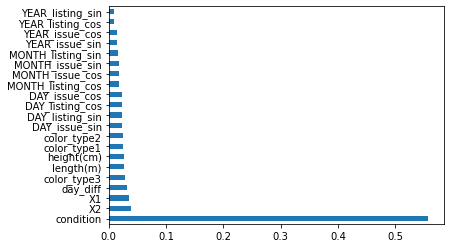

In [35]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(21).plot(kind='barh')
plt.show()

In [36]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [37]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf=RandomForestClassifier(**{'criterion': 'entropy', 'max_depth': 50, 'max_features':18, 'n_estimators': 2500},n_jobs=-1)

In [39]:
rf.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=18,
                       n_estimators=2500, n_jobs=-1)

[21/21] features ████████████████████ Time elapsed: 82 seconds

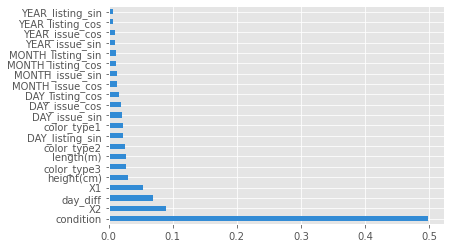

In [40]:
interpreter = Interpretation(X, feature_names=X.columns)
model = InMemoryModel(rf.predict_proba, examples=X)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)

In [41]:
rf.classes_

array([0., 1., 2.])

[3/3] grid cells ████████████████████ Time elapsed: 38 seconds

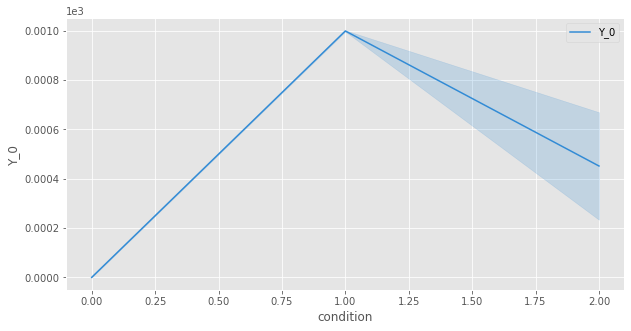

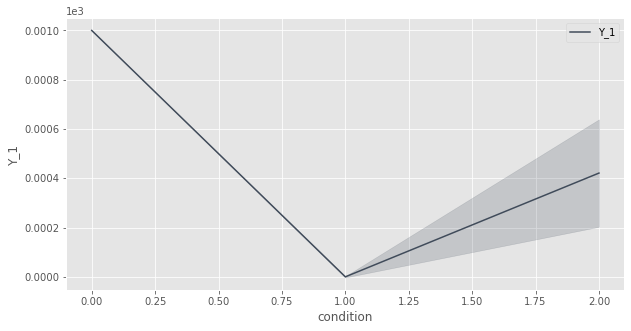

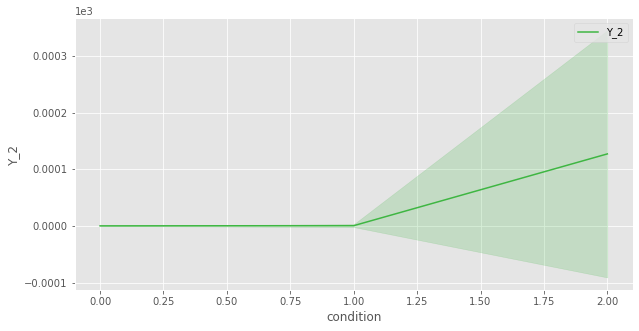

In [42]:
pyint_model = InMemoryModel(rf.predict_proba, examples=X, target_names=['Y_0','Y_1','Y_2'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['condition'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

[30/30] grid cells ████████████████████ Time elapsed: 22 seconds

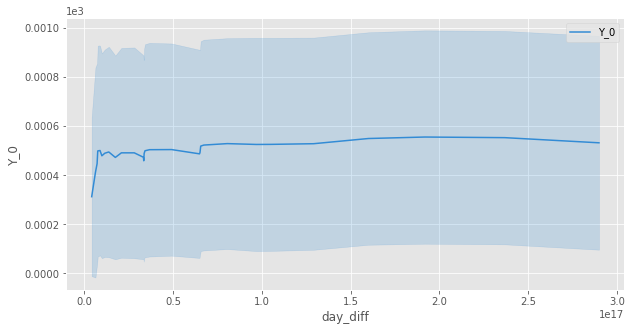

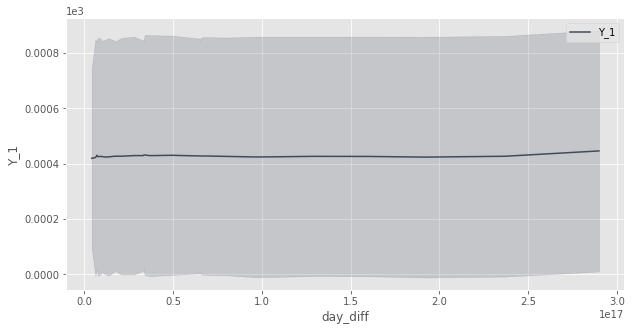

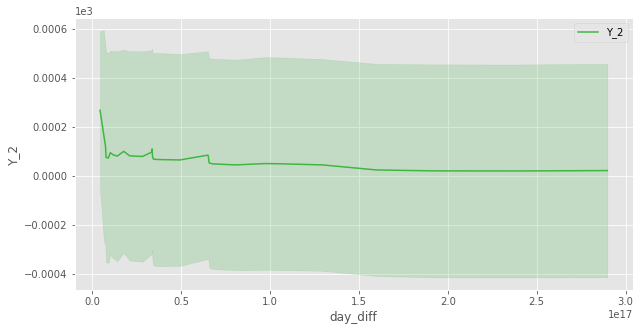

In [58]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(['day_diff'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

[12/12] grid cells ████████████████████ Time elapsed: 14 seconds

[[<Figure size 1152x720 with 2 Axes>,
  <Figure size 1152x720 with 2 Axes>,
  <Figure size 1152x720 with 2 Axes>,
  <Axes3DSubplot:xlabel='X1', ylabel='X2'>,
  <Axes3DSubplot:xlabel='X1', ylabel='X2'>,
  <Axes3DSubplot:xlabel='X1', ylabel='X2'>]]

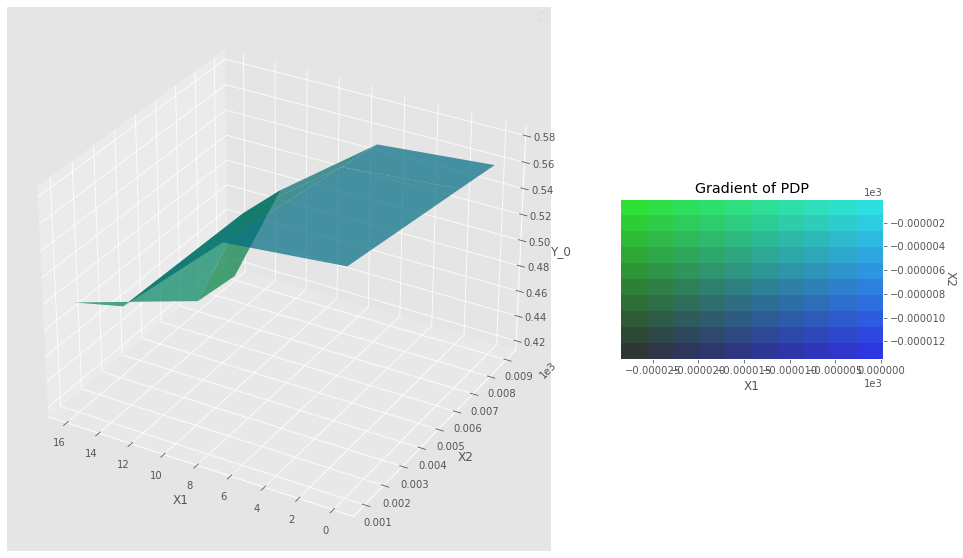

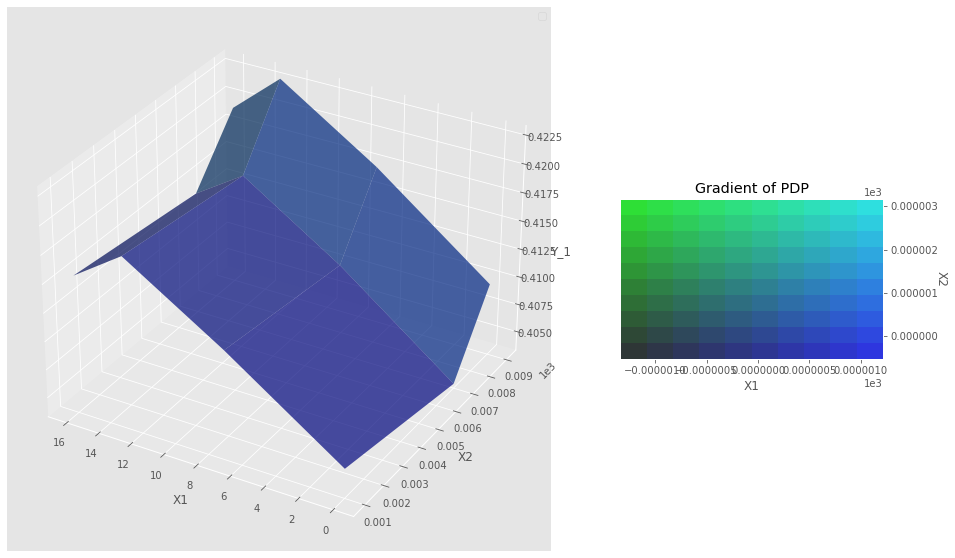

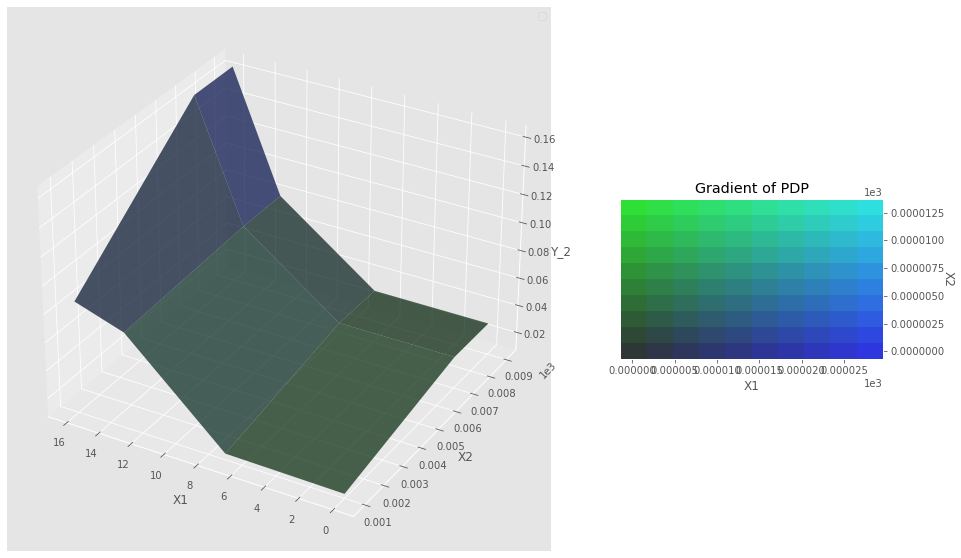

In [61]:
model = InMemoryModel(rf.predict_proba, examples=X, target_names=['Y_0', 'Y_1','Y_2'])
interpreter.partial_dependence.plot_partial_dependence([('X1', 'X2')], model, 
                                                       grid_resolution=10)

In [21]:
from sklearn.preprocessing import StandardScaler
# Standarize features
scaler = StandardScaler()
x_train_std = scaler.fit_transform(X)

SVC - for Breed catagory

In [38]:
y_pred_breed_cat

array([0., 1., 1., ..., 1., 1., 1.])

In [31]:
y_train1.value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [32]:
y_train2.value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [64]:
# Parameter Optimisation with Hyperopt-checkpoint -XGB`

In [49]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [43]:
from sklearn.model_selection import train_test_split
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train_breed,test_size=0.2)

In [51]:
def acc_model(params):
    XGB = XGBClassifier(**params)
    return cross_val_score(XGB, x_train, y_train).mean()

In [46]:
param_space = {
    'max_depth': hp.choice('max_depth', range(1,50)),
    
    'n_estimators': hp.choice('n_estimators', range(100,5000)),
    
    
    'min_child_weight': hp.choice('min_child_weight',range(1,15)),
    'max_delta_step': hp.choice('max_delta_step',range(1,15))
    

}

In [47]:
best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

In [52]:
trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=10, trials=trials)
print ('best:')
print (best)

new best:                                             
0.8680557002381409                                    
{'max_delta_step': 12, 'max_depth': 15, 'min_child_weight': 14, 'n_estimators': 1476}
new best:                                                                         
0.8680557002381409                                                                
{'max_delta_step': 9, 'max_depth': 34, 'min_child_weight': 14, 'n_estimators': 2426}
new best:                                                                         
0.8680557002381409                                                                
{'max_delta_step': 14, 'max_depth': 10, 'min_child_weight': 11, 'n_estimators': 3493}
new best:                                                                         
0.8705781472059474                                                                
{'max_delta_step': 14, 'max_depth': 26, 'min_child_weight': 1, 'n_estimators': 2506}
new best:                                         

In [ ]:
# parameter optimization for RandomForest

In [80]:
def acc_model(params):
    clf = ExtraTreesClassifier(**params)
    return cross_val_score(clf, x_train, y_train).mean()

In [81]:
param_space = {
    'max_depth': hp.choice('max_depth', range(1,50)),
    'max_features': hp.choice('max_features', range(1,16)),
    'n_estimators': hp.choice('n_estimators', range(100,5000)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}

In [82]:
best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

In [83]:
trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=10, trials=trials)
print ('best:')
print (best)

new best:                                             
0.8482108606566854                                    
{'criterion': 'gini', 'max_depth': 5, 'max_features': 7, 'n_estimators': 869}
new best:                                                                        
0.8691178747436181                                                               
{'criterion': 'gini', 'max_depth': 20, 'max_features': 6, 'n_estimators': 2076}  
new best:                                                                         
0.8691178747436181                                                                
{'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'n_estimators': 784}     
new best:                                                                         
0.8691178747436181                                                                
{'criterion': 'entropy', 'max_depth': 22, 'max_features': 7, 'n_estimators': 2192}
new best:                                                           

In [ ]:
for - Breed
XGB: {'max_delta_step': 2, 'max_depth': 8, 'min_child_weight': 0, 'n_estimators': 1424} - 89%
RF: {'criterion': 0, 'max_depth': 3, 'max_features': 4, 'n_estimators': 1259} - 90.2%
EXT:{'criterion': 0, 'max_depth': 5, 'max_features': 5, 'n_estimators': 913} - 90.27
    
for - Pet
XGB - {'max_delta_step': 1, 'max_depth': 2, 'min_child_weight': 9, 'n_estimators': 1910}  -  86.04
RF: {'criterion': 1, 'max_depth': 12, 'max_features': 1, 'n_estimators': 1309} - 87.09
EXT: {'criterion': 1, 'max_depth': 11, 'max_features': 4, 'n_estimators': 207} - 87.9


In [53]:
x_train=pet_train.drop(['breed_category','pet_category'],axis=1)
x_train_breed=pet_train.drop('breed_category',axis=1)
x_train_pet=pet_train.drop('pet_category',axis=1)
y_train_breed=pet_train['breed_category']
y_train_pet=pet_train['pet_category']

In [54]:
x_test=pet_test

Aplaying Model

In [78]:
clf = OneVsRestClassifier(ExtraTreesClassifier(n_jobs=-1)).fit(x_train, y_train_breed)

In [79]:
clf.score(x_train,y_train_breed)

1.0

In [16]:
x_test.head(5)

,condition,length(m),height(cm),X1,X2,color_type1,color_type2,color_type3
0,0.0,0.87,42.73,0,7,-9.410458,-25.757317,-11.774953
1,1.0,0.06,6.71,0,1,8.076126,-39.063812,-11.360184
2,1.0,0.24,41.21,0,7,-9.410458,-25.757317,-11.774953
3,1.0,0.29,8.46,7,1,-9.410458,-25.757317,-11.774953
4,1.0,0.71,30.92,0,7,-34.015579,-0.833776,-6.739098


In [80]:
y_pred_breed_cat=clf.predict(x_test)

In [77]:
x_test['breed_category']=clf.predict(x_test)
x_test=x_test[x_train_pet.columns]
x_test.head(5)

,condition,length(m),height(cm),X1,X2,breed_category,day_diff,color_type1,color_type2,color_type3
0,0.0,0.87,42.73,0,7,2,380561700000000000,18.971708,4.500733,-13.109763
1,1.0,0.06,6.71,0,1,2,15096240000000000,3.645189,21.368313,-18.906076
2,1.0,0.24,41.21,0,7,2,172774260000000000,18.971708,4.500733,-13.109763
3,1.0,0.29,8.46,7,1,2,99213900000000000,18.971708,4.500733,-13.109763
4,1.0,0.71,30.92,0,7,2,40052520000000000,21.690432,26.462399,-3.971352


In [161]:
x_test=x_test.drop(['breed_category'],axis=1)

KeyError: "['breed_category'] not found in axis"

In [59]:
from sklearn.metrics import accuracy_score, classification_report 

In [63]:
pip install xgboost --default-timeout=100

The system cannot find the path specified.


SVC - for pet catagory

In [81]:
clf=OneVsRestClassifier(ExtraTreesClassifier(n_jobs=-1)).fit(x_train,y_train_pet)

In [82]:
clf.score(x_train,y_train_pet)

1.0

In [83]:
y_pred_pet_cat=clf.predict(x_test)

In [58]:
y_pred_pet_cat

array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

In [63]:
temp=pd.read_csv(r"C:\Users\JaisoN\Desktop\Desktop\Hacker_Earth\Adopt a buddy\Dataset\test.csv")

In [84]:
submission=pd.DataFrame
({
    'pet_id': temp['pet_id'],
    'breed_category':y_pred_breed_cat,
    'pet_category':y_pred_pet_cat
})

In [85]:
submission.to_csv('pet_adoption.csv', index=False)

In [86]:
submission['breed_category'].value_counts()

0.0    4063
1.0    3488
2.0     521
Name: breed_category, dtype: int64

In [87]:
submission['pet_category'].value_counts()

2    5263
1    2546
4     257
0       6
Name: pet_category, dtype: int64

In [172]:
#x_test['pet_category']=clf.predict(x_test)

x_test=x_test[x_train_breed.columns]
x_test.head(5)

,condition,length(m),height(cm),X1,X2,pet_category,day_diff,color_type1,color_type2,color_type3
0,0.0,0.87,42.73,0,7,2,380561700000000000,7.536939,-16.695566,-4.424664
1,1.0,0.06,6.71,0,1,2,15096240000000000,-29.823044,-28.958437,-34.617458
2,1.0,0.24,41.21,0,7,2,172774260000000000,7.536939,-16.695566,-4.424664
3,1.0,0.29,8.46,7,1,1,99213900000000000,7.536939,-16.695566,-4.424664
4,1.0,0.71,30.92,0,7,2,40052520000000000,9.865405,-16.457994,17.933245


In [170]:
x_test=x_test.drop(['breed_category'],axis=1)